# Step 1: Analyze Essay-BR

[Essay-BR](https://github.com/rafaelanchieta/essay) is a corpus containing essays written in Brazilian Portuguese by high school students. These essays have 5 scores, each representing the 5 skills analyzed by the Exame Nacional do Ensino Médio (ENEM).

To run this notebook, you'll need to copy this to the Essay-BR local repo.

In [1]:
from build_dataset import Corpus

c = Corpus()
c.read_corpus().shape

(4570, 5)

In [10]:
train, valid, test = c.read_splits()

print("Split shapes")
print("Train:       ", train.shape)
print("Validation:  ", valid.shape)
print("Test:        ", test.shape)

Split shapes
Train:        (3198, 5)
Validation:   (686, 5)
Test:         (686, 5)


#### Spacy setup
Essay-BR uses Spacy, and the **pt_core_news_sm** package to analyze the text statistics

In [8]:
!python -m spacy download pt_core_news_sm

     --------------------------------------- 13.0/13.0 MB 43.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
from essay_statistics import Statistic
import nltk
nltk.download('punkt')

train_statistics = Statistic(train)
test_statistics = Statistic(test)
valid_statistics = Statistic(valid)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laure\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
train_score = train_statistics.statistics_score()
test_score = test_statistics.statistics_score()
valid_score = valid_statistics.statistics_score()

In [18]:
train_essay = dict(train_statistics.statistics_essays())
test_essay = dict(test_statistics.statistics_essays())
valid_essay = dict(valid_statistics.statistics_essays())

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_score(dataset: pd.Series, ds_name: str, color: str):
    ordered = dataset.sort_index()

    grades = ordered.index.to_numpy()
    count = ordered.values

    plt.bar(x=grades, height=count, width=20, color=color)
    plt.xlabel("Grades")
    plt.ylabel("# of essays")
    plt.title(f"Distribution of grades \n {ds_name} set")
    plt.show()

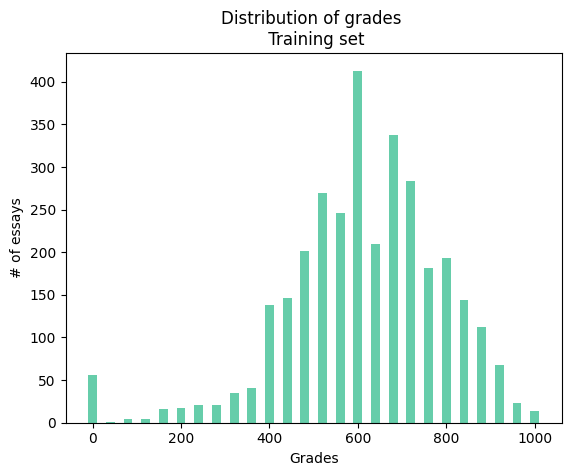

In [56]:
plot_score(train_score, "Training", "mediumaquamarine")

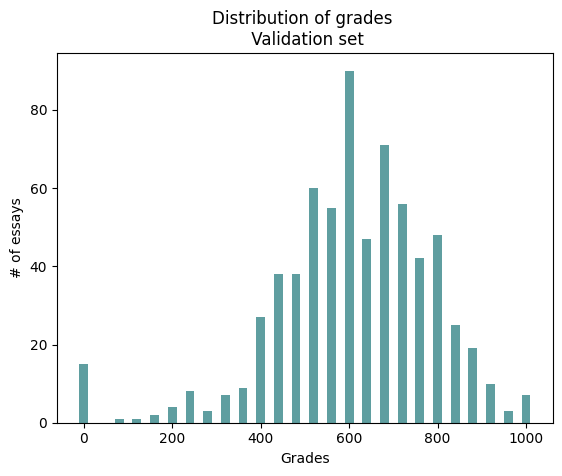

In [59]:
plot_score(valid_score, "Validation", "cadetblue")

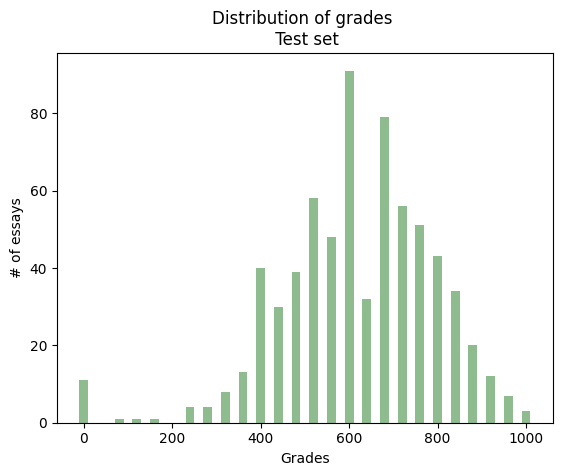

In [60]:
plot_score(test_score, "Test", "darkseagreen")